In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import scipy.stats as stats


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('/kaggle/input/global-blood-type-distribution/bloodtypes.csv')

In [3]:
df.isnull().sum()
df[df.isnull().any(axis=1)]
df = df.fillna(0)


In [4]:
summary_stats = df[['O+', 'A+', 'B+', 'AB+','O-','A-','B-','AB-']].describe()


print("Summary Statistics for Blood Type Percentages:")
print(summary_stats)

Summary Statistics for Blood Type Percentages:
               O+          A+          B+         AB+          O-          A-  \
count  126.000000  126.000000  126.000000  126.000000  126.000000  126.000000   
mean    40.351190   29.665079   16.403413    4.827143    3.885635    3.251190   
std      9.991809    6.351653    7.564090    2.543609    2.545848    2.511485   
min     25.500000   14.000000    4.720000    0.500000    0.000000    0.000000   
25%     32.075000   25.817500   10.000000    2.925000    1.722500    1.000000   
50%     38.175000   30.000000   15.000000    4.295000    3.950000    2.700000   
75%     46.822500   34.850000   21.235000    6.300000    6.000000    6.000000   
max     75.000000   46.300000   36.800000   14.700000   13.000000    8.000000   

               B-         AB-  
count  126.000000  126.000000  
mean     1.323810    0.492381  
std      0.866533    0.382975  
min      0.000000    0.000000  
25%      0.510000    0.135000  
50%      1.225000    0.400000  

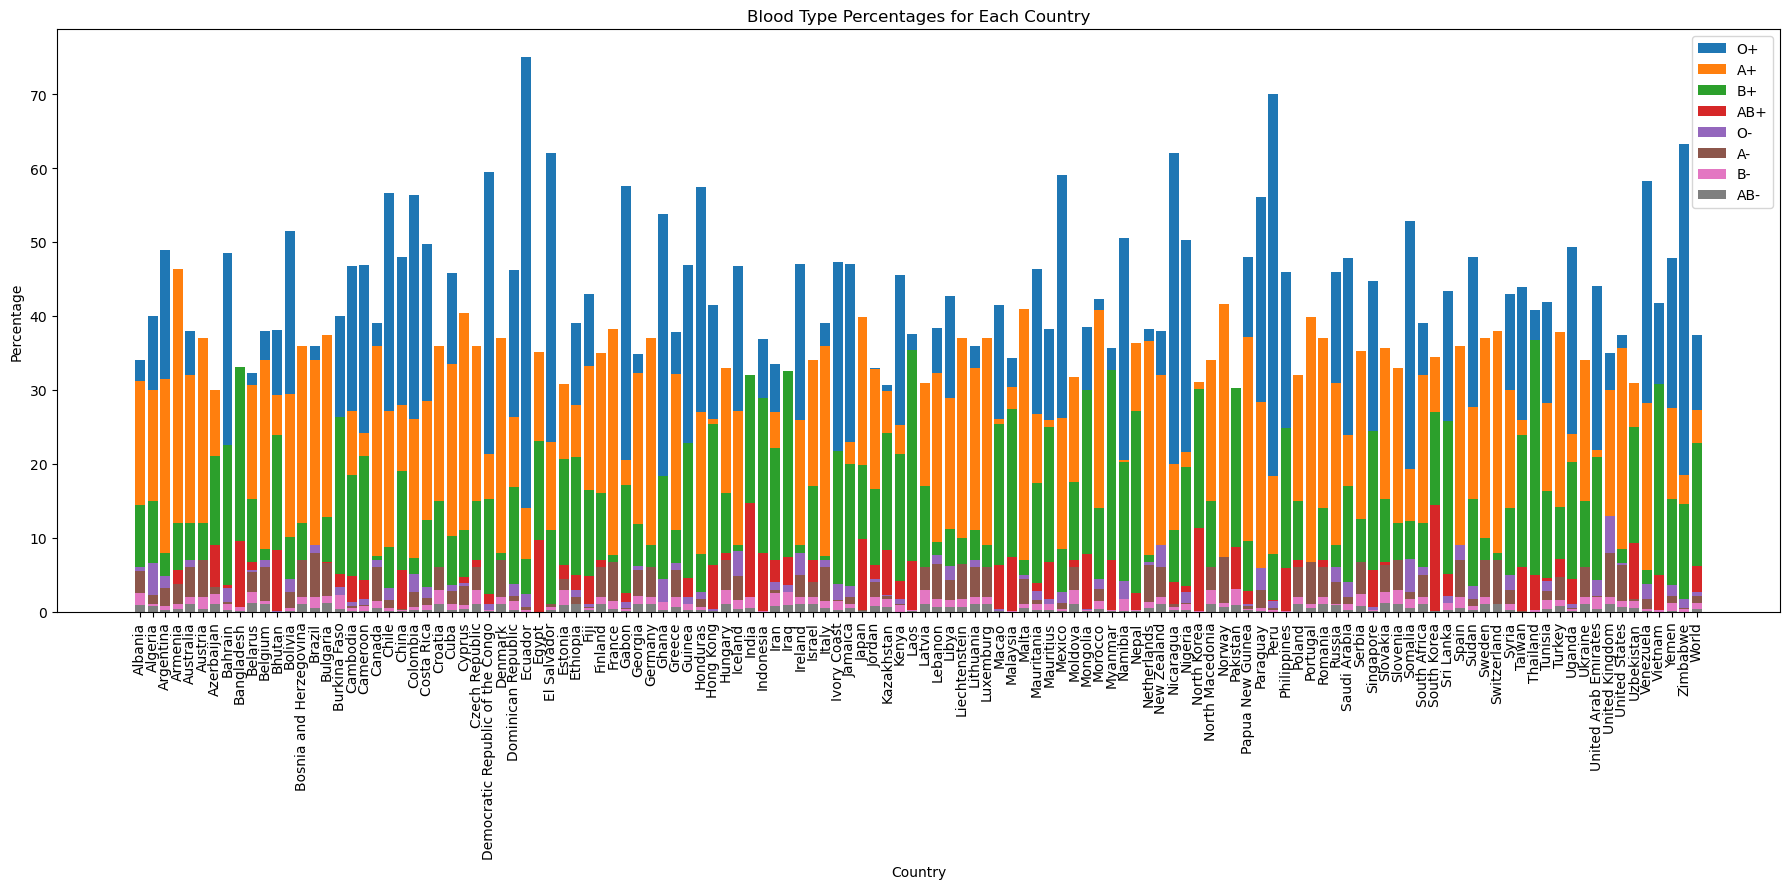

In [5]:
blood_type_columns = ['O+', 'A+', 'B+', 'AB+', 'O-', 'A-', 'B-', 'AB-']

# Plotting bar plot for each blood type percentage
plt.figure(figsize=(18, 9))
for blood_type in blood_type_columns:
    plt.bar(df['Country'], df[blood_type], label=blood_type)

plt.xlabel('Country')
plt.ylabel('Percentage')
plt.title('Blood Type Percentages for Each Country')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


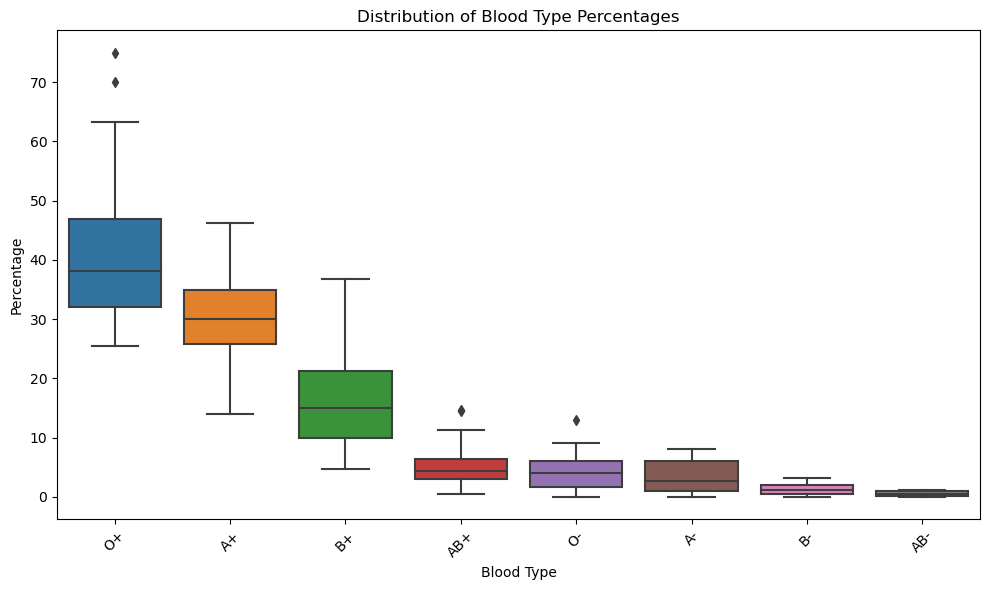

In [6]:
# Melt the DataFrame to create a 'BloodType' column and a 'Percentage' column
df_melted = df.melt(id_vars='Country', value_vars=blood_type_columns, var_name='BloodType', value_name='Percentage')

# Plotting box plot for each blood type percentage
plt.figure(figsize=(10, 6))
sns.boxplot(x='BloodType', y='Percentage', data=df_melted)
plt.xlabel('Blood Type')
plt.ylabel('Percentage')
plt.title('Distribution of Blood Type Percentages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_20/1436509836.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_shapefile = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Figure size 3600x1800 with 0 Axes>

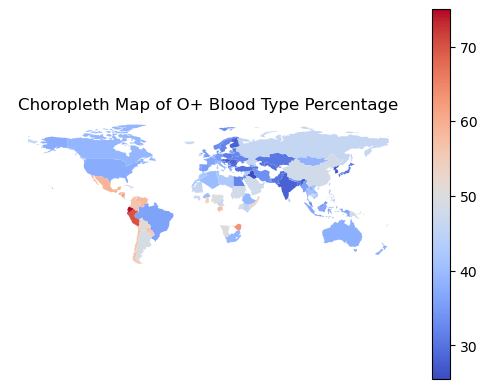

In [7]:
df['Country'] = df['Country'].replace('United States', 'United States of America')

# Load a world shapefile for mapping
world_shapefile = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


# Merge the shapefile with DataFrame on the 'Country' column
merged_df = world_shapefile.merge(df, left_on='name', right_on='Country', how='left')

# Plot the choropleth map
plt.figure(figsize=(36, 18))
merged_df.plot(column='O+', cmap='coolwarm', legend=True)
plt.title('Choropleth Map of O+ Blood Type Percentage')
plt.axis('off')
plt.show()


In [8]:
grouped_df = merged_df.groupby('continent')[['O+', 'A+', 'B+', 'AB+', 'O-', 'A-', 'B-', 'AB-']].mean()
print("Grouped and Aggregated DataFrame:")
print(grouped_df)

Grouped and Aggregated DataFrame:
                                O+         A+         B+       AB+        O-  \
continent                                                                      
Africa                   46.392000  25.567000  17.970000  3.931000  3.421500   
Antarctica                     NaN        NaN        NaN       NaN       NaN   
Asia                     36.155278  28.690556  23.384167  6.929444  2.081389   
Europe                   33.818235  34.275882  11.811765  4.661765  6.243529   
North America            51.054444  28.103333  10.781111  2.670000  3.503333   
Oceania                  41.750000  33.625000  11.775000  3.650000  4.500000   
Seven seas (open ocean)        NaN        NaN        NaN       NaN       NaN   
South America            56.524444  26.353333   7.487778  1.650000  4.453333   

                               A-        B-       AB-  
continent                                              
Africa                   1.784000  1.131000  0.329500

In [9]:
grouped_df1 = merged_df.groupby('continent')[['O+', 'A+', 'B+', 'AB+', 'O-', 'A-', 'B-', 'AB-']].median()
print("Grouped and Aggregated DataFrame:")
print(grouped_df1)

Grouped and Aggregated DataFrame:
                             O+      A+      B+  AB+    O-     A-     B-  \
continent                                                                  
Africa                   46.565  24.675  17.885  4.1  3.18  1.655  1.075   
Antarctica                  NaN     NaN     NaN  NaN   NaN    NaN    NaN   
Asia                     35.210  27.750  24.050  6.9  1.84  1.200  0.935   
Europe                   32.750  34.500  11.500  4.6  6.00  6.000  2.000   
North America            49.700  27.000  10.200  2.9  3.40  1.900  0.900   
Oceania                  40.500  32.650  10.800  3.5  4.00  3.400  1.250   
Seven seas (open ocean)     NaN     NaN     NaN  NaN   NaN    NaN    NaN   
South America            56.300  28.200   7.800  1.6  4.39  2.700  0.490   

                           AB-  
continent                       
Africa                   0.200  
Antarctica                 NaN  
Asia                     0.215  
Europe                   1.000  
North A

<Figure size 1200x600 with 0 Axes>

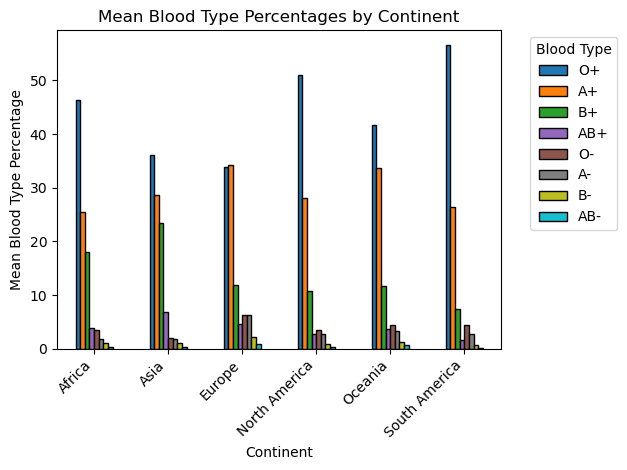

In [10]:
#Drop rows corresponding to 'Antarctica' and 'Seven seas (open ocean)'
grouped_df.drop(['Antarctica', 'Seven seas (open ocean)'], inplace=True)

# Create the bar plot
plt.figure(figsize=(12, 6))
grouped_df.plot(kind='bar', cmap='tab10', edgecolor='black')
plt.title('Mean Blood Type Percentages by Continent')
plt.xlabel('Continent')
plt.ylabel('Mean Blood Type Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Blood Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

/tmp/ipykernel_20/3227977241.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/3227977241.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/3227977241.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/3227977241.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/3227977241.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/3227977241.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/3227977241.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


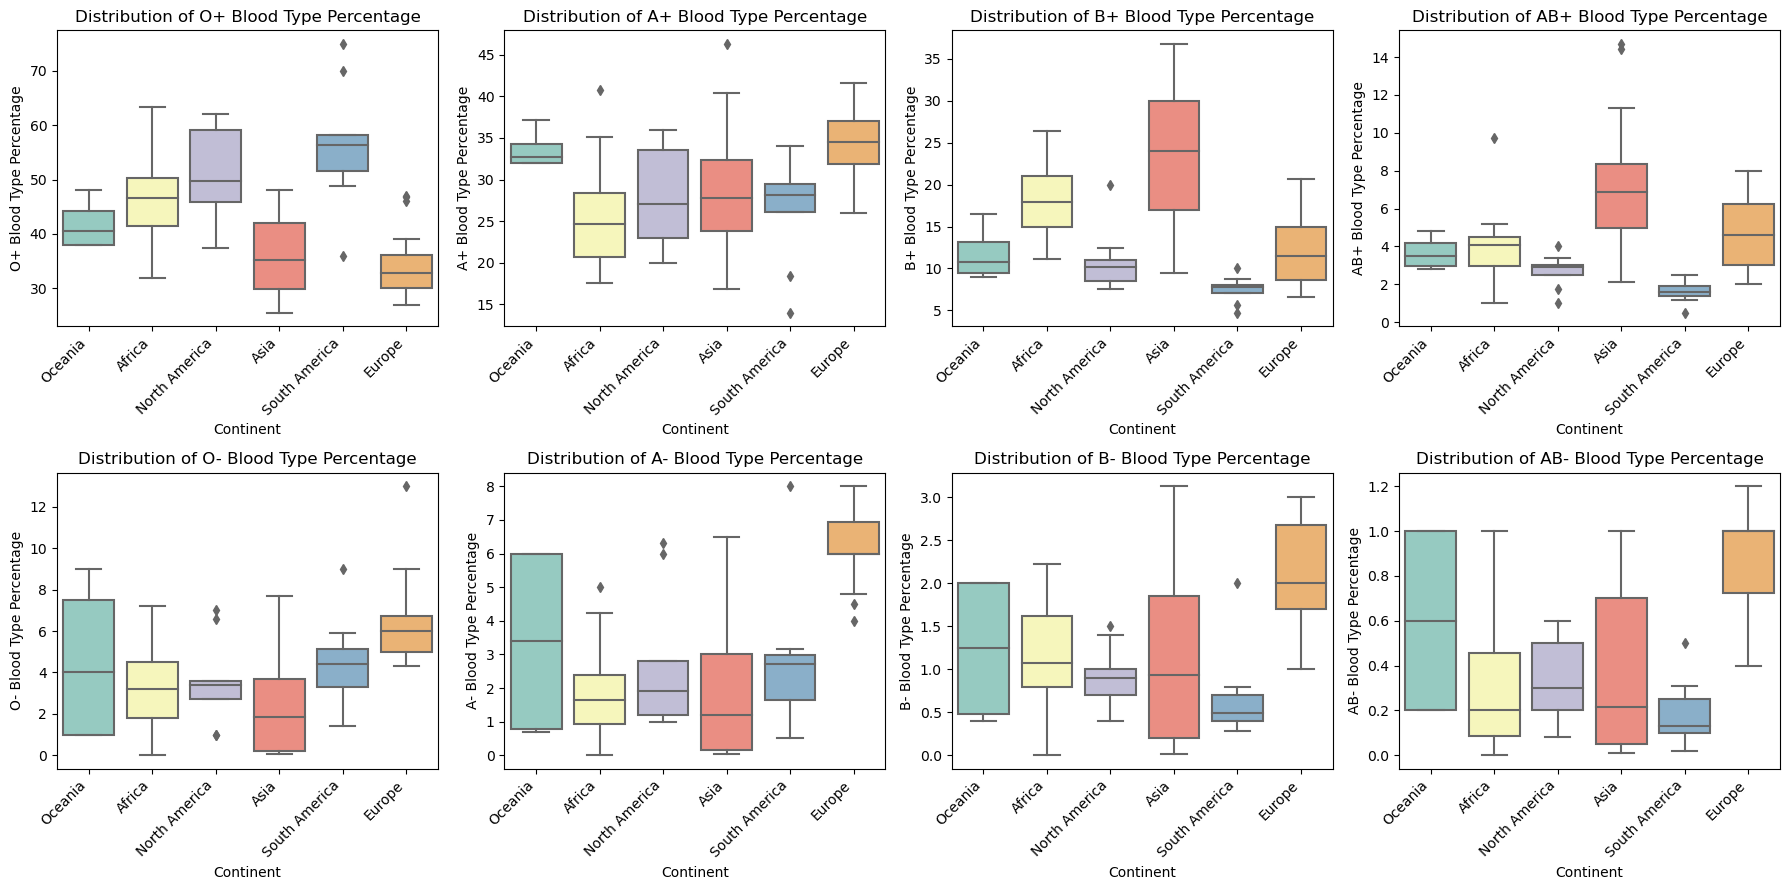

In [11]:
merged_df = merged_df[~merged_df['continent'].isin(['Antarctica', 'Seven seas (open ocean)'])]


blood_type_cols = ['O+', 'A+', 'B+', 'AB+', 'O-', 'A-', 'B-', 'AB-']
plt.figure(figsize=(18, 9))

for i, blood_type in enumerate(blood_type_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=merged_df, x='continent', y=blood_type, palette='Set3', fliersize=5)
    plt.title(f'Distribution of {blood_type} Blood Type Percentage')
    plt.xlabel('Continent')
    plt.ylabel(f'{blood_type} Blood Type Percentage')
    plt.tight_layout()

    plt.xticks(rotation=45, ha='right')

plt.show()






/tmp/ipykernel_20/2756840665.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/2756840665.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/2756840665.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/2756840665.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/2756840665.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/2756840665.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_20/2756840665.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


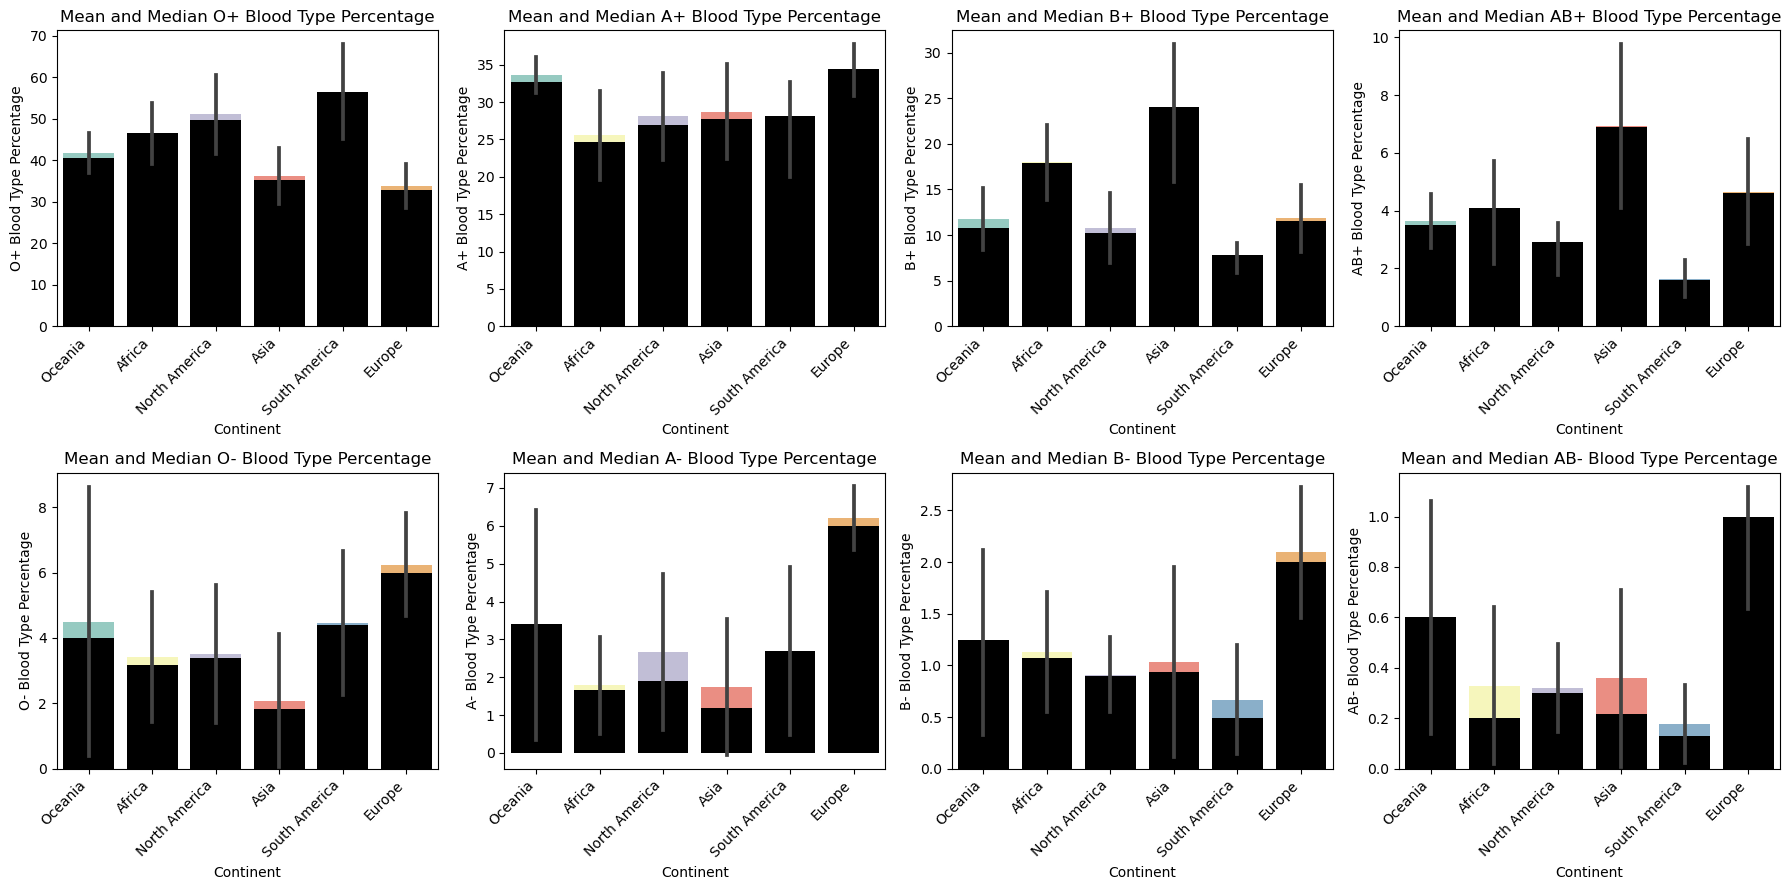

In [12]:
plt.figure(figsize=(18, 9))

for i, blood_type in enumerate(blood_type_cols, 1):
    plt.subplot(2, 4, i)
    sns.barplot(data=merged_df, x='continent', y=blood_type, estimator='mean', errorbar='sd', palette='Set3')
    sns.barplot(data=merged_df, x='continent', y=blood_type, estimator='median', errorbar=None, color='black')
    plt.title(f'Mean and Median {blood_type} Blood Type Percentage')
    plt.xlabel('Continent')
    plt.ylabel(f'{blood_type} Blood Type Percentage')
    plt.tight_layout()

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45, ha='right')

plt.show()






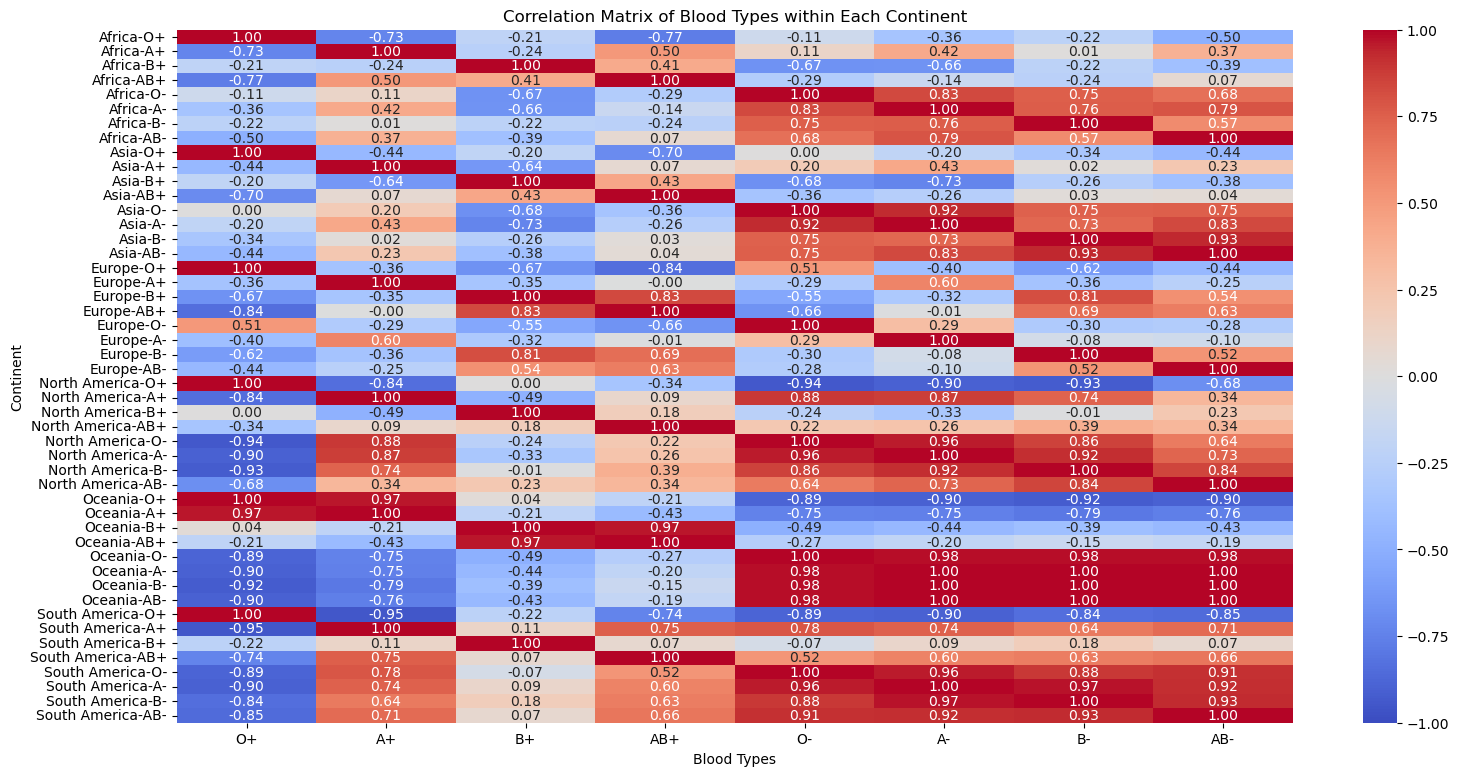

In [13]:
correlation_matrix = merged_df.groupby('continent')[blood_type_cols].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(18, 9
                   ))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Blood Types within Each Continent')
plt.xlabel('Blood Types')
plt.ylabel('Continent')
plt.show()

In [14]:
# Calculate the global mean blood type percentages for each blood type
mean_blood_type_cols = ['O+', 'A+', 'B+', 'AB+', 'O-', 'A-', 'B-', 'AB-']
global_mean_blood_type_percentages = df[mean_blood_type_cols].mean()

# Calculate the percentage difference for each continent
for continent in merged_df['continent'].unique():
    print(f"\nContinent: {continent}")
    for blood_type in mean_blood_type_cols:
        continent_mean = merged_df[merged_df['continent'] == continent][blood_type].mean()
        percentage_difference = ((continent_mean - global_mean_blood_type_percentages[blood_type]) / global_mean_blood_type_percentages[blood_type]) * 100
        print(f"Percentage Difference for {blood_type}: {percentage_difference:.2f}%")


Continent: Oceania
Percentage Difference for O+: 3.47%
Percentage Difference for A+: 13.35%
Percentage Difference for B+: -28.22%
Percentage Difference for AB+: -24.39%
Percentage Difference for O-: 15.81%
Percentage Difference for A-: 3.81%
Percentage Difference for B-: -7.46%
Percentage Difference for AB-: 21.86%

Continent: Africa
Percentage Difference for O+: 14.97%
Percentage Difference for A+: -13.81%
Percentage Difference for B+: 9.55%
Percentage Difference for AB+: -18.56%
Percentage Difference for O-: -11.94%
Percentage Difference for A-: -45.13%
Percentage Difference for B-: -14.56%
Percentage Difference for AB-: -33.08%

Continent: North America
Percentage Difference for O+: 26.53%
Percentage Difference for A+: -5.26%
Percentage Difference for B+: -34.28%
Percentage Difference for AB+: -44.69%
Percentage Difference for O-: -9.84%
Percentage Difference for A-: -18.29%
Percentage Difference for B-: -31.18%
Percentage Difference for AB-: -35.01%

Continent: Asia
Percentage Dif

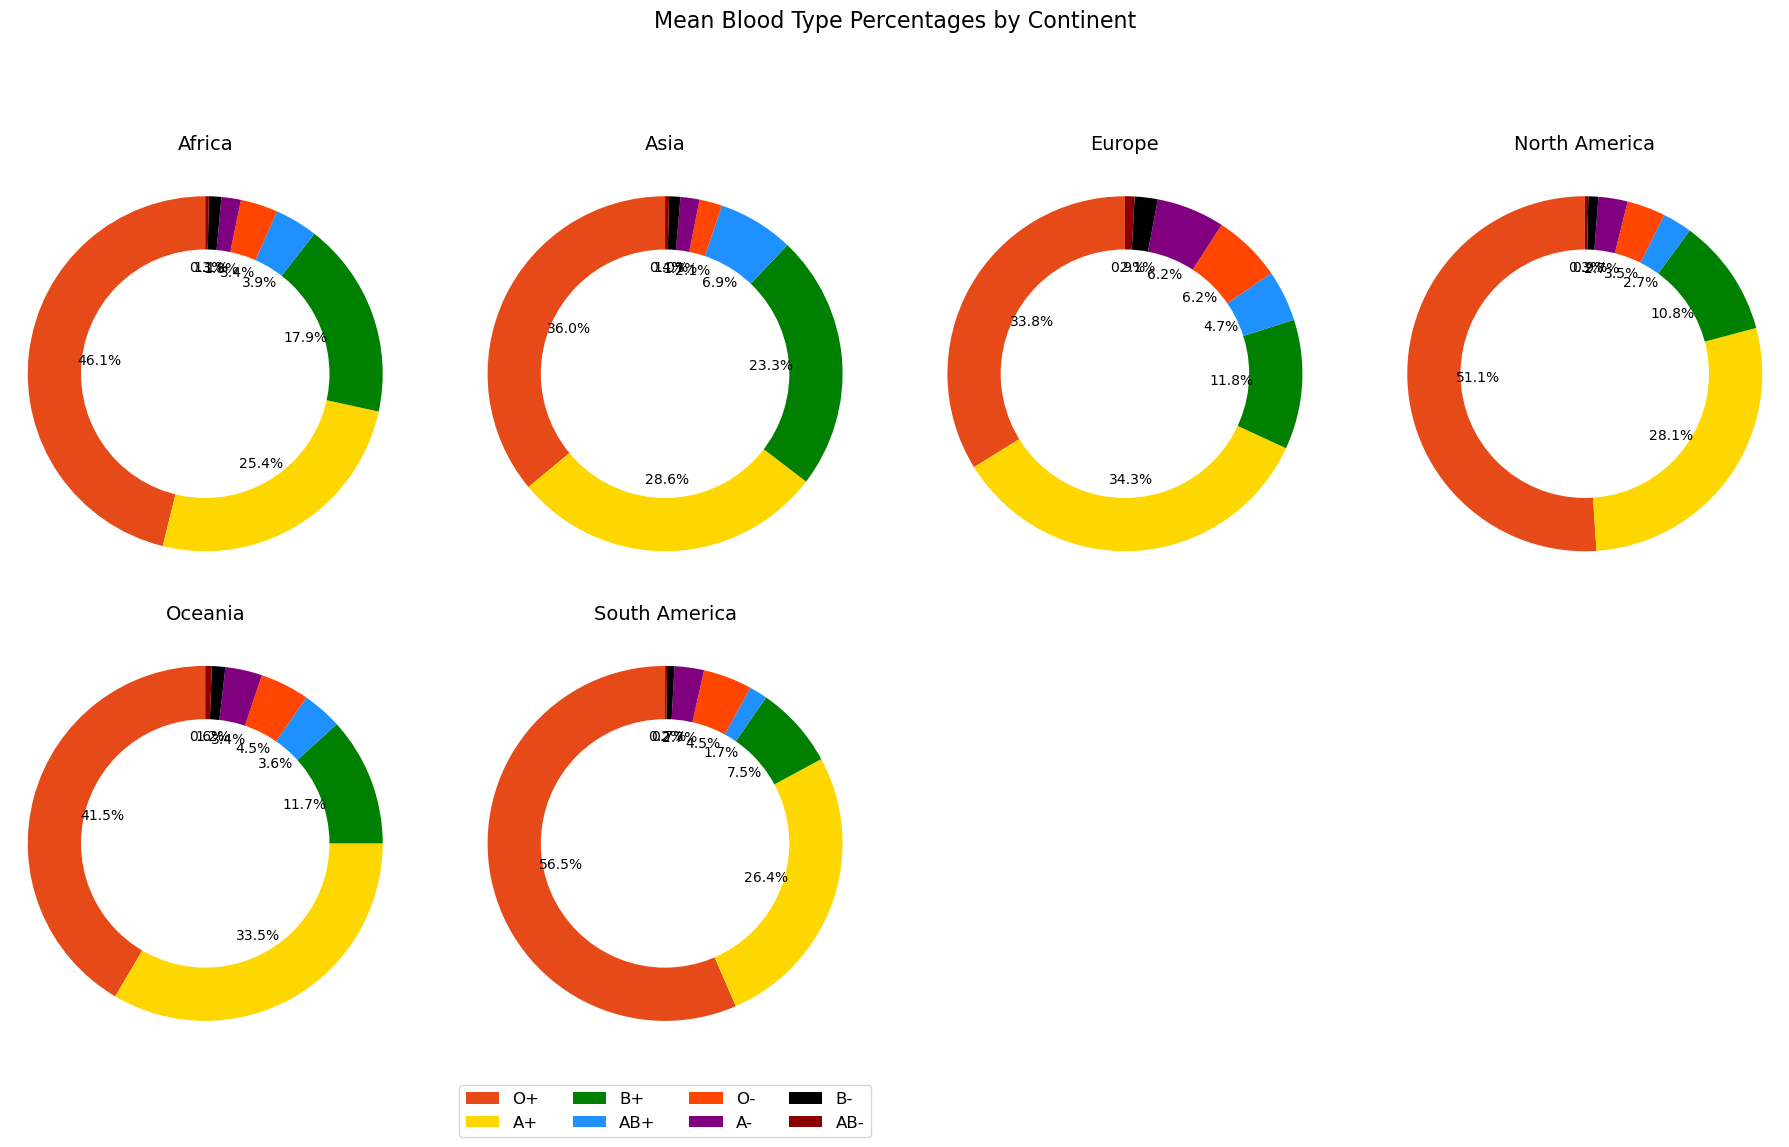

In [15]:
mean_blood_type_percentages = merged_df.groupby('continent')[mean_blood_type_cols].mean()

plt.figure(figsize=(18, 12))

# List of colors for the blood type categories
colors = ['#E64A19', '#FFD700', '#008000', '#1E90FF', '#FF4500', '#800080', '#000000', '#8B0000']

for i, continent in enumerate(mean_blood_type_percentages.index):
    plt.subplot(2, 4, i+1)
    plt.pie(mean_blood_type_percentages.loc[continent], colors=colors, labels=None, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
    plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white')) # Create a white circle at the center to make it a donut chart
    plt.title(continent, fontsize=14)
    plt.axis('equal') # Equal aspect ratio ensures that the pie chart is drawn as a circle

# Add a common legend for all the donut charts
plt.legend(mean_blood_type_cols, loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=4, fontsize=12)

plt.suptitle('Mean Blood Type Percentages by Continent', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.92]) 
plt.show()




